## Problem Statement: To Predict the Height of son by Father's height 

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('error')

In [2]:
# import Dataset

fs = pd.read_csv('C:/Users/Win11/Documents/My learning/Python_Projects/Son_Father_height/Pearson.csv')

In [3]:
fs.head(2)

,Father,Son
0,65.0,59.8
1,63.3,63.2


In [4]:
fs.shape

(1078, 2)

In [5]:
fs.columns

Index(['Father', 'Son'], dtype='object')

In [6]:
fs.info

<bound method DataFrame.info of       Father   Son
0       65.0  59.8
1       63.3  63.2
2       65.0  63.3
3       65.8  62.8
4       61.1  64.3
...      ...   ...
1073    67.0  70.8
1074    71.3  68.3
1075    71.8  69.3
1076    70.7  69.3
1077    70.3  67.0

[1078 rows x 2 columns]>

In [7]:
fs.isnull().sum()

Father    0
Son       0
dtype: int64

In [8]:
## Statiscal Description

print(fs.describe())
print(fs.info())

            Father          Son
count  1078.000000  1078.000000
mean     67.686827    68.684230
std       2.745827     2.816194
min      59.000000    58.500000
25%      65.800000    66.900000
50%      67.800000    68.600000
75%      69.600000    70.500000
max      75.400000    78.400000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB
None


In [9]:
# Count outliers
    
from scipy import stats
z_scores = stats.zscore(fs[['Father', 'Son']])
print((z_scores).sum())

Father    4.177991e-12
Son      -1.421085e-12
dtype: float64


In [10]:
fs.Father.value_counts()
fs.Son.value_counts()

68.6    26
68.1    21
68.2    21
67.2    20
66.3    20
        ..
61.3     1
75.3     1
61.8     1
62.2     1
58.8     1
Name: Son, Length: 146, dtype: int64

In [11]:
n_unique_father = fs['Father'].nunique()

In [12]:
n_unique_Son = fs['Son'].nunique()

In [13]:
correlation = fs.corr()

## EDA

In [14]:
# Data Distribution

array([[<AxesSubplot:title={'center':'Father'}>,
        <AxesSubplot:title={'center':'Son'}>]], dtype=object)

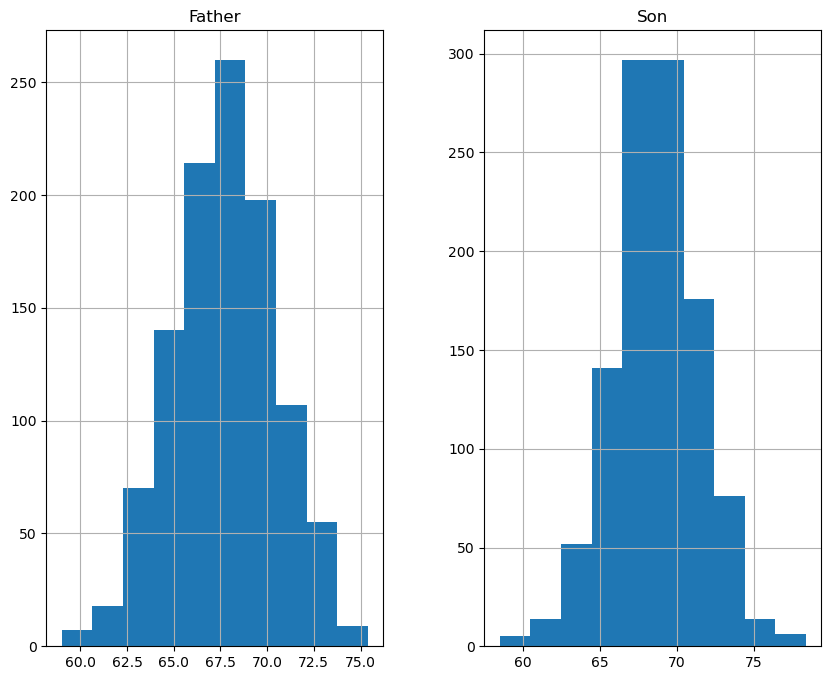

In [15]:
fs.hist(column= ['Father','Son'], bins =10, figsize =(10,8))

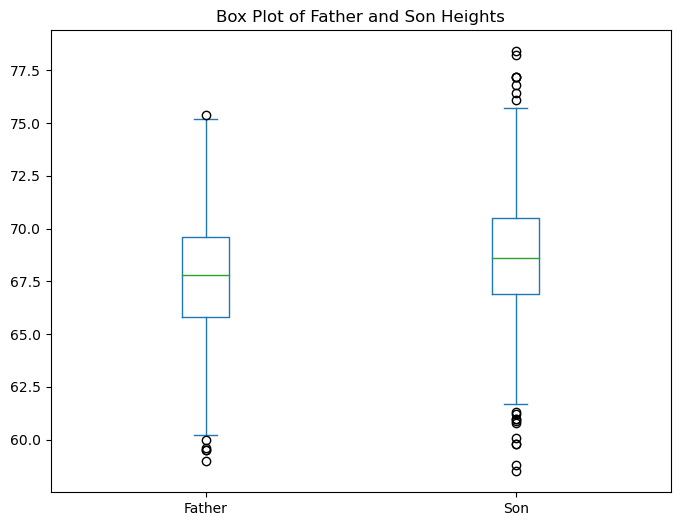

In [16]:
fs[['Father', 'Son']].plot(kind='box', figsize=(8, 6))
plt.title("Box Plot of Father and Son Heights")
plt.show()

<AxesSubplot:>

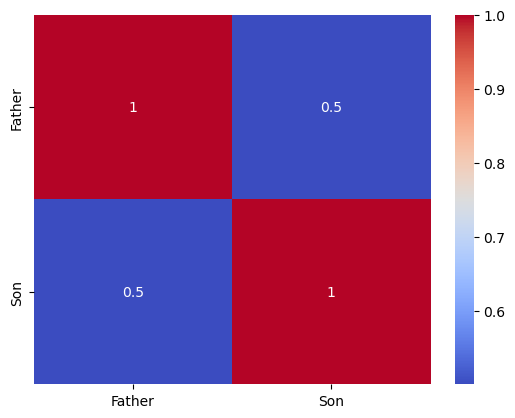

In [17]:
# Correlation Analysis

sns.heatmap(data = correlation, annot= True, cmap = 'coolwarm' )

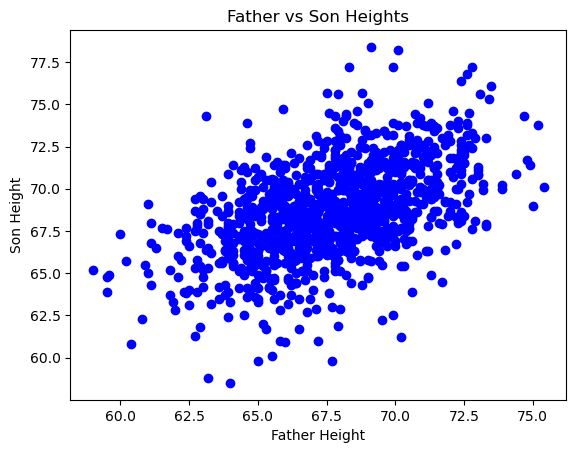

In [18]:
# Bivariate Analysis

plt.scatter(fs['Father'], fs['Son'], color='blue', linewidths=None)
plt.title('Father vs Son Heights')
plt.xlabel('Father Height')
plt.ylabel('Son Height')
plt.show()

In [19]:
# importing libraries to SLR Build Model 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
X = fs[['Father']]  # Independent variable (feature)
y = fs['Son']  # Dependent variable (target)

In [21]:
# Split Dataset 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# Model fit

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
print(X_test)

      Father
239     63.9
1016    70.6
725     66.1
486     66.0
561     71.1
...      ...
474     64.7
632     68.8
658     63.0
533     72.4
483     66.1

[216 rows x 1 columns]


In [24]:
print(y_test)

239     66.7
1016    70.4
725     68.1
486     67.1
561     69.5
        ... 
474     66.8
632     75.7
658     65.2
533     68.6
483     67.2
Name: Son, Length: 216, dtype: float64


In [25]:
# slope, intercept 

model.coef_[0]
model.intercept_

print('Slope:', slope)
print('Intercept:', intercept)

NameError: name 'slope' is not defined

In [26]:
# Y = Mx + C

Predicted_Son = 0.5095715884190017 * 63.9 + 34.23079977950441

In [27]:
y_pred = model.predict(X_test)

In [29]:
print("Shape of y:", y.shape)
print("Shape of y_pred:", y_pred.shape)


Shape of y: (1078,)
Shape of y_pred: (216,)


In [30]:
# Model Evaluation  

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)

Mean Squared Error (MSE): 6.117228348454616
Root Mean Squared Error (RMSE): 2.4733031250646604
Mean Absolute Error (MAE): 1.9075737297322102
R-squared (R^2): 0.24422017915747418


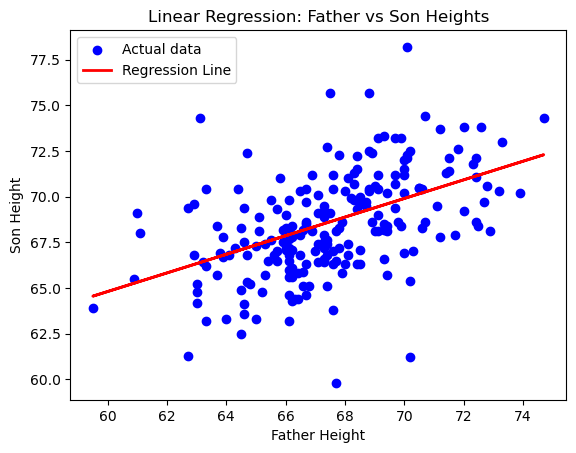

In [141]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression: Father vs Son Heights')
plt.xlabel('Father Height')
plt.ylabel('Son Height')
plt.legend()
plt.show()

## Summary 

Based on the evaluation metrics provided, here is a summary of my linear regression model's performance:

Model Performance Summary

- Mean Squared Error (MSE): 6.12
- Root Mean Squared Error (RMSE): 2.47
- Mean Absolute Error (MAE): 1.91
- R-squared (R²): 0.24

